 # Matplotlib Basics by Brad Solomon

 Learning note from: https://realpython.com/python-matplotlib-guide/
 
 key points:
 
 - Pylab: What Is It, and Should I Use It?
 - The Matplotlib Object Hierarchy
 - Stateful Versus Stateless Approaches
 - Understanding plt.subplots() Notation
 - The “Figures” Behind The Scenes
 - A Burst of Color: imshow() and matshow()
 - Plotting in Pandas
 - Appendix A: Configuration and Styling
 - Appendix B: Interactive Mode

In [1]:
# NOTE: `from pylab import *` is out-of-date
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

## The Matplotlib Object Hierarchy

![](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

![](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)

matplotlib.figure.Figure

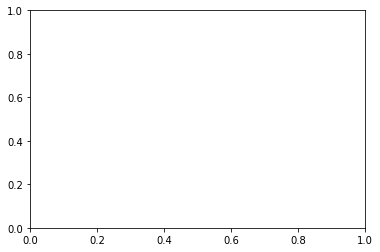

In [2]:
# figure is the big container
fig, _ = plt.subplots()
type(fig)

In [3]:
# figure > axes > axis > major ticks
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

## Stateful Versus Stateless Approaches

most functions in `plt.` implicitly refer to current Figure and current Axes, such as `plt.plot()`

```python
# matplotlib/pyplot.py
>>> def plot(*args, **kwargs):
...     """An abridged version of plt.plot()."""
...     ax = plt.gca()
...     return ax.plot(*args, **kwargs)
>>> def gca(**kwargs):
...     """Get the current Axes of the current Figure."""
...     return plt.gcf().gca(**kwargs)
```

many top level functions delegate to current Axes with `gca()` and then call methods of it. ref: [source code: pyplot.py](https://github.com/matplotlib/matplotlib/blob/master/lib/tplotlib/pyplot.py)

therefore `ax.do()` is equivalent to `plt.do()`, but a more readable OO approach

## Understanding plt.subplots() Notation

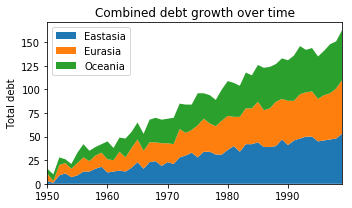

In [4]:
# create a single axes
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

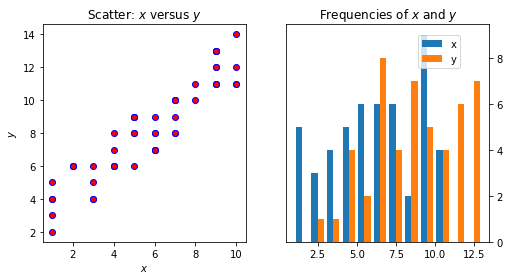

In [5]:
# create 2 axes
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, x.size)
data = np.column_stack((x, y))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set(xlabel='$x$', ylabel='$y$')
ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

In [6]:
# customize layout with `gridspec`
# download data
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [7]:
# in-plot title helper function
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

![](https://files.realpython.com/media/empty_gridspec_annot.782349dc90a1.png)

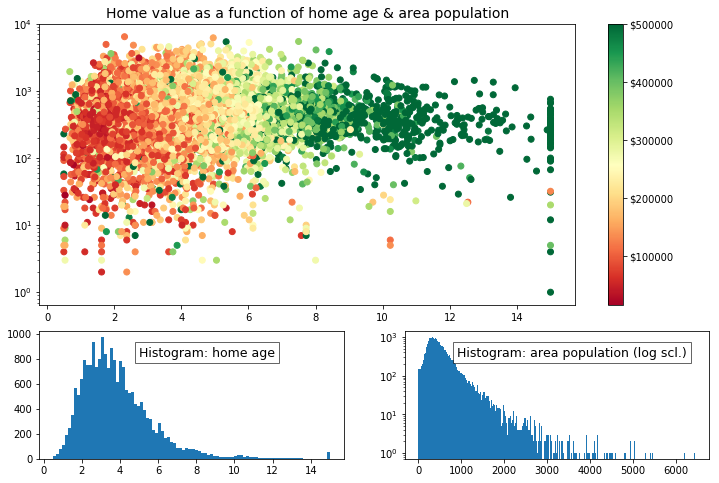

In [8]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8)) # NOTE: create a figure without axes
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))
ax1.set_title('Home value as a function of home age & area population', fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)
add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

## The “Figures” Behind The Scenes

`plt.gcf()`` returns the current figure, while all figures created in the current session
are still in the memory. They can be closed using

1. `plt.close()` for current figure
2. `plt.close(i)` for the ith figure returned by `plt.get_fignums()`
3. `plt.close('all')` for all figures

## A Burst of Color: imshow() and matshow()

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


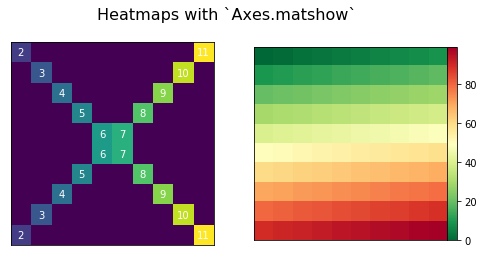

In [9]:
# create 2 matrices
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)

# setup plot options
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)

# plot within context manager
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.matshow(x)
    img2 = ax2.matshow(x2, cmap='RdYlGn_r')
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size='5%', pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16)

## Plotting in Pandas

The `plot()` method on pandas' Series and DataFrame is a wrapper around `plt.plot()`. 

Therefore, we can do something more with `plt.gca()` after plotting with pandas.

注意: 以下案例中的 `blended_transform_factory()` 属于 transform 的一种, 主要作用是在不同的坐标系间转换位置. 例如: `blended_transform_factory(ax.transData, ax.transAxes)` 表示横轴将 x 值转换成 data 坐标系的位置, 将 y 值转换成 display 坐标系的位置, 即 (0, 1) 表示坐标中下限和上限. 更多内容参见官方的简短教学: [Transform Tutorial](https://matplotlib.org/tutorials/advanced/transforms_tutorial.html).

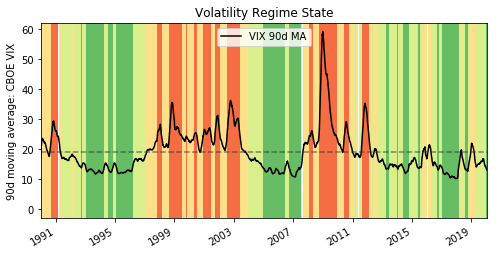

In [10]:
import pandas as pd
import matplotlib.transforms as mtransforms

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True).dropna()
ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf],
               labels=range(4))

cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4),
        label='VIX 90d MA')
ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i,
                    facecolor=color, transform=trans)
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')

## Appendix A: Configuration and Styling

keep configs in `~/.matplotlib/matplotlibrc` and sync with github

or config interactively

In [11]:
[attr for attr in dir(plt) if attr.startswith('rc')]

['rc', 'rcParams', 'rcParamsDefault', 'rc_context', 'rcdefaults']

1. plt.rcdefaults() restores the rc parameters from matplotlib’s internal defaults, which are listed at plt.rcParamsDefault. This will revert (overwrite) whatever you’ve already customized in a matplotlibrc file.
2. plt.rc() is used for setting parameters interactively.
3. plt.rcParams is a (mutable) dictionary-like object that lets you manipulate settings directly. If you have customized settings in a matplotlibrc file, these will be reflected in this dictionary.

In [0]:
plt.rc('lines', linewidth=2, color='r')  # Syntax 1

plt.rcParams['lines.linewidth'] = 2  # Syntax 2
plt.rcParams['lines.color'] = 'r'

In [0]:
# show styles
plt.style.available

ref to style sheets for more: https://matplotlib.org/gallery.html#style_sheets

In [0]:
# set styles
plt.style.use('seaborn-whitegrid')